# Extreme Value Anlaysis using daily Precipitation data from Cal-Adapt API

In [1]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
from scipy.stats.distributions import genextreme
from scipy.stats.distributions import genpareto

----
# Download data
----

Daily data is stored as a multiband raster, e.g. observed daily timeseries (1950 -2013) has 23376 bands with each band corresponding to one day, starting from 1950-01-01. Units for the observed data are mm and projected data are in kg/m2/s.

The code in the next cell contains a bunch of functions to:
    - fetch daily data given a slug and params
    - convert units to inches
    - return a new Pandas dataframe that contains all the data

In [2]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'

# Request header
headers = {'ContentType': 'json'}

# Params
point = 'POINT(-121.4687 38.5938)'
params = {'g': point}

def mm_to_inches(val):
    return val * 0.0393701

def kgm2s_to_inches(val):
    return  (val * 86400) * 0.0393701

def kgm2s_to_mm(val):
    return  (val * 86400)

In [3]:
def process_daily_data(slug, params):
    # Make request
    url = api + '/series/' + slug + '/rasters/'
    response = requests.get(url, params=params)
    
    # Get data
    if response.ok:
        print('Processing:', slug)
        json = response.json()
        data = json['results'][0]

        # Multiband raster data is returned by the API as a 3D array having a shape like (233376, 1, 1)
        # Flatten the 3D array into a 1D array
        values_arr = np.array(data['image'])
        values_arr = values_arr.flatten()

        # Get total number of values -> number of days
        length = len(values_arr)

        # Get start date of timeseries
        start_date = datetime.strptime(data['event'], '%Y-%m-%d')

        # Create new pandas dataframe and map each value in list to a date index
        df = pd.DataFrame(
            values_arr,
            index=pd.date_range(start_date, freq='1D', periods=length),
            columns=['value'],
        )

        # Convert units to Fahrenheit
        units = data['units']
        #if units == 'mm':
        #    df.value = df.value.apply(lambda x: mm_to_inches(x))
        if units == 'kg/m2/s':
            df.value = df.value.apply(lambda x: kgm2s_to_mm(x))
        else:
            pass
            
        # Add slug as a column
        df['series'] = slug.split('_')[2]
        
        # Add wateryear as a column
        df['year'] = df.index.year
        df['month'] = df.index.month
        df['wateryear'] = np.where(df['month'] > 9, df['year'] + 1, df['year'])

    else:
        print('Failed to download:', slug)
            
    # Combine all the dataframes into one and return
    return df

In [4]:
# Download observed daily timeseries
def get_observed():
    # Create slug
    slug = 'pr_day_livneh'
    df = process_daily_data(slug, params)
    return df

observedDF = get_observed()
observedDF

Processing: pr_day_livneh


,value,series,year,month,wateryear
1950-01-01,0.555716,livneh,1950,1,1950
1950-01-02,0.990185,livneh,1950,1,1950
1950-01-03,0.000000,livneh,1950,1,1950
1950-01-04,0.000000,livneh,1950,1,1950
1950-01-05,0.000000,livneh,1950,1,1950
1950-01-06,0.000000,livneh,1950,1,1950
1950-01-07,7.082851,livneh,1950,1,1950
1950-01-08,5.789548,livneh,1950,1,1950
1950-01-09,1.111432,livneh,1950,1,1950
1950-01-10,16.267319,livneh,1950,1,1950


In [5]:
# Download projected daily timeseries. The projected daily timeseries are from 2006 - 2099/2100
# and units are in kg/m2/s.
def get_projections():
    # Create an empty list to hold dataframes
    df_list = []

    # Make a combined list of GCMs, scenarios, climate variables for looping
    climvar = ['pr']
    period = ['day']
    models = ['CNRM-CM5']
    scenarios = ['rcp45', 'historical']
    zipped = itertools.product(climvar, period, models, scenarios)
    
    # Request parameters
    params = {'g': point}

    # Loop through zipped
    for item in zipped:
        # Create slug
        slug = '_'.join(item)
        df = process_daily_data(slug, params)
        df_list.append(df)
            
    # Combine all the dataframes into one and return
    return pd.concat(df_list)

projectedDF = get_projections()
projectedDF

Processing: pr_day_CNRM-CM5_rcp45
Processing: pr_day_CNRM-CM5_historical


,value,series,year,month,wateryear
2006-01-01,0.000000,CNRM-CM5,2006,1,2006
2006-01-02,0.000000,CNRM-CM5,2006,1,2006
2006-01-03,0.000000,CNRM-CM5,2006,1,2006
2006-01-04,0.000000,CNRM-CM5,2006,1,2006
2006-01-05,0.000000,CNRM-CM5,2006,1,2006
2006-01-06,0.000000,CNRM-CM5,2006,1,2006
2006-01-07,0.000000,CNRM-CM5,2006,1,2006
2006-01-08,0.000000,CNRM-CM5,2006,1,2006
2006-01-09,0.000000,CNRM-CM5,2006,1,2006
2006-01-10,0.012259,CNRM-CM5,2006,1,2006


In [6]:
# Combine observed and projected data into a single dataframe
df = pd.concat([observedDF, projectedDF])

----
# Select Threshold
----

Using a baseline period of wateryears 1961 - 1990, calculate the 90th, 95th and 99th percentiles of daily precipitation values within a water year from the observed data. Count number of days with values above threshold.

In [7]:
# CALCULATE THRESHOLDS

# Filter data by baseline time period
baselineDF = df.loc[(df['wateryear'] >= 1961) & (df['wateryear'] <= 1990) & (df['series'] == 'livneh')]

# Filter out zero precip values
baselineDF = baselineDF.loc[(baselineDF['value'] > 0)]
threshold90 = baselineDF['value'].quantile(0.90, interpolation='linear')
threshold95 = baselineDF['value'].quantile(0.95, interpolation='linear')
threshold99 = baselineDF['value'].quantile(0.99, interpolation='linear')

print('90th Percentile Threshold is', round(threshold90, 2), 'mm/day')
print('95th Percentile Threshold is', round(threshold95, 2), 'mm/day')
print('99th Percentile Threshold is', round(threshold99, 2), 'mm/day')

90th Percentile Threshold is 15.76 mm/day
95th Percentile Threshold is 22.2 mm/day
99th Percentile Threshold is 39.78 mm/day


----
# Extreme Value Analysis
----

### Approach 1: Block Maxima/Annual Maximum Series (AMS)

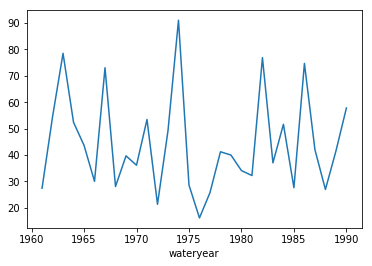

In [8]:
# Create Annual Maximum Series
baselineDF_max = baselineDF.groupby('wateryear').value.max()
baselineDF_max.plot()

# Create an array of maximum values by water year
AMS = baselineDF_max.values

In [9]:
def extreme_value_analysis_gev(AMS):
    print('GEV model fitted to Annual Maximum Series using MLE estimation method')
    # Calculate distribution parameters
    params = genextreme.fit(AMS)
    shape, location, scale = params

    # Fit of GEV distribution based on MLE estimation (default in SciPy)
    gev_fit = genextreme(*params)
    print('Estimated Parameters:')
    print('shape: {}, location: {}, scale: {}'.format(shape, location, scale))
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
    
    ## DENSITY PLOT
    # x axis values for density plot
    x = np.linspace(gev_fit.ppf(0.001), gev_fit.ppf(0.999), 100)
    # plot
    #fig, ax = plt.subplots(figsize=(8, 6))
    ax1.plot(x, gev_fit.pdf(x), label = 'Fitted', color = 'k')
    ax1.hist(AMS, density = True, color = 'yellow', alpha = 0.75, label = "Empirical")
    ax1.set_title('Density Plot')
    ax1.set_xlabel('Precipitation(mm)')
    ax1.set_ylabel('Probability')
    ax1.legend(loc='best', frameon=False)
    
    ## RETURN VALUE PLOT
    # Value indicating the frecuency of events per year
    # frec of 1 => yearly data (1 value per year)
    frec = 1
    # x axis values for return value plot
    T = np.arange(0.1, 100.1, 0.1)
    sT = gev_fit.isf(frec * 1./T)
    N = np.r_[1:len(AMS)+1] * frec
    Nmax = max(N)
    # plot
    ax2.semilogx(T, sT)
    ax2.scatter(frec * Nmax/N, sorted(AMS)[::-1], color = 'orangered')
    ax2.set_title('Return Level Plot')
    ax2.set_xlabel('Return period')
    ax2.set_ylabel('Return level')
    ax2.grid(True)
    
    # Get Return Levels (precipitation values) for Return Periods
    print('Return Levels:')
    print('2-year Return Level = ', gev_fit.isf(1./2), 'mm')
    print('5-year Return Level = ', gev_fit.isf(1./5), 'mm')
    print('10-year Return Level = ', gev_fit.isf(1./10), 'mm')
    print('20-year Return Level = ', gev_fit.isf(1./20), 'mm')
    print('50-year Return Level = ', gev_fit.isf(1./50), 'mm')
    print('100-year Return Level = ', gev_fit.isf(1./100), 'mm')


GEV model fitted to Annual Maximum Series using MLE estimation method
Estimated Parameters:
shape: -0.07499606867274433, location: 35.39082789501435, scale: 13.692202391926685
Return Levels:
2-year Return Level =  40.478803302544385 mm
5-year Return Level =  57.12799559506954 mm
10-year Return Level =  68.95606152867694 mm
20-year Return Level =  80.94477508441247 mm
50-year Return Level =  97.4557225397771 mm
100-year Return Level =  110.60698529929579 mm


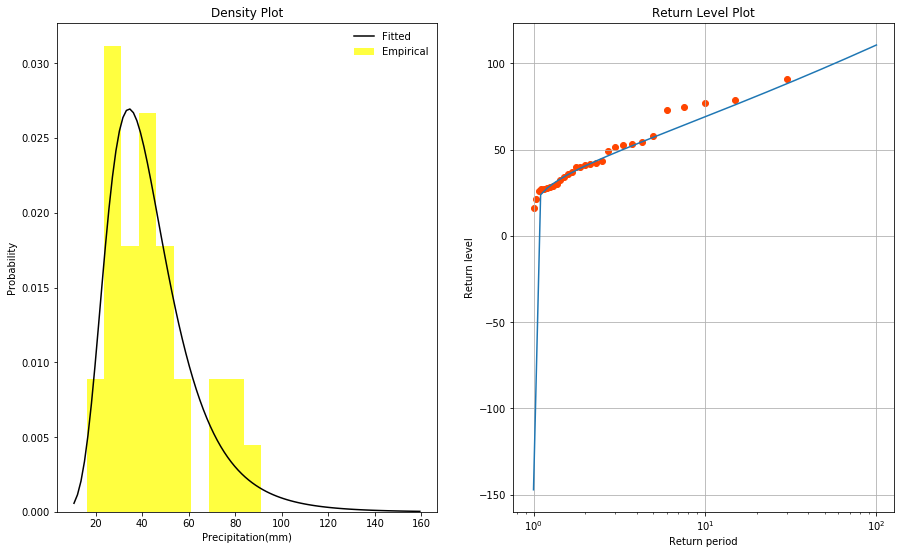

In [10]:
extreme_value_analysis_gev(AMS)

### Approach 2: Peak Over Threshold/Parital Duration Series (PDS)

In [11]:
# Select threshold value

# Method 1 - Use lowest value from the Annual Maximum Series
min_AMS = np.min(AMS)

# Method 2 - Use a percentile threshold from all values
# calculated above

threshold = min_AMS
print(min_AMS, threshold90)

16.133459091186523 15.76212215423584


Number of observations in PDS = 2661


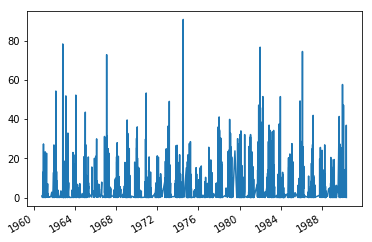

In [12]:
# Create an array of all non-zero daily values 
PDS_baseline = baselineDF['value'].values
print('Number of observations in PDS =', len(PDS_baseline))
baselineDF['value'].plot()

In [13]:
# Functions adapted from https://github.com/wcarthur/extremes

def returnLevels(intervals, mu, xi, sigma, rate, npyr):
    """
    Calculate return levels for specified intervals for a generalised pareto
    distribution with the given threshold, scale and shape parameters.

    :param intervals: :class:`numpy.ndarray` or float of recurrence intervals
              to evaluate return levels for.
    :param float mu: Threshold parameter (also called location).
    :param float xi: Shape parameter.
    :param float sigma: Scale parameter.
    :param float rate: Rate of exceedances (i.e. number of observations greater
                       than `mu`, divided by total number of observations).
    :param float npyr: Number of observations per year.

    :returns: return levels for the specified recurrence intervals.

    """

    rlevels = mu + (sigma / xi) * (np.power(intervals * npyr * rate, xi) - 1.)
    return rlevels

def empReturnPeriod(data, npyr):
    """
    Returns the empirically-based recurrence interval (in years) for a set
    of observations.

    It is assumed the data are daily observations. If the observations are not
    daily, there are two options: set the ``npyr`` variable, or backfill the
    ``data`` variable with zero values to match the assumed length of the
    record.

    The highest return period should be (approximately) len(``data``)/``npyr``.

    :param data: :class:`numpy.ndarray` containing the observed values (with
                 missing values removed).
    :param float npy: Number of observations per year (default=365.25)

    :returns: Recurrence intervals for the observed data.
    :rtype: :class:`numpy.ndarray`
    """
    nobs = len(data)
    # Empirical return periods:
    emprp = 1. / (1. - np.arange(1, nobs + 1, 1) / (nobs + 1)) / npyr
    return emprp

In [14]:
def extreme_value_analysis_gp(PDS, threshold, label):
    print('GP model fitted to Partial Duration Series Series using MLE estimation method')
    # Calculate distribution parameters
    params = genpareto.fit(PDS[PDS > threshold] - threshold)
    shape, location, scale = params

    # Fit of GEV distribution based on MLE estimation (default in SciPy)
    gpa_fit = genpareto(*params)
    print('Estimated Parameters:')
    print('shape: {}, location: {}, scale: {}'.format(shape, location, scale))
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ## DENSITY PLOT
    # x axis values for plot
    x = np.linspace(gpa_fit.ppf(0.001), gpa_fit.ppf(0.999), 100)
    # plot
    ax1.plot(x, gpa_fit.pdf(x), label = 'Modeled', color = 'k')
    ax1.hist(PDS, density = True, color = 'yellow', alpha = 0.75, label = "Empirical")
    ax1.set_title('Density Plot')
    ax1.set_xlabel('Precipitation(mm)')
    ax1.set_ylabel('Probability')
    ax1.legend(loc='best', frameon=False) 
    
    ## RETURN VALUE PLOT
    # x axis values for plot
    rp = np.array([2, 5, 10, 20, 50, 100, 500])
    rate = float(len(PDS[PDS > threshold])) / float(len(PDS))
    npyr = len(PDS) / 30
    rval = returnLevels(rp, threshold, shape, scale, rate, npyr)

    emprp = empReturnPeriod(PDS, npyr)
    sortedmax = np.sort(PDS)

    # plot
    ax2.set_title('Return Level Plot')
    ax2.set_xlabel('Return period')
    ax2.set_ylabel('Return level')
    ax2.grid(True)
    ax2.semilogx(rp, rval, label = 'Modeled RP', color = 'k')
    ax2.scatter(emprp[emprp > 1], sortedmax[emprp > 1], s=100, color='r', label="Empirical RP")
    ax2.legend(loc='best', frameon=False)
    
    # Get Return Levels (precipitation values) for Return Periods
    print('Return Levels:')
    print('2-year Return Level = ', rval[0], 'mm')
    print('5-year Return Level = ', rval[1], 'mm')
    print('10-year Return Level = ', rval[2], 'mm')
    print('20-year Return Level = ', rval[3], 'mm')
    print('50-year Return Level = ', rval[4], 'mm')
    print('100-year Return Level = ', rval[5], 'mm')
    
    return pd.DataFrame({'RP': rp, 'RL': rval, 'Period': label})


GP model fitted to Partial Duration Series Series using MLE estimation method
Estimated Parameters:
shape: 0.12855457595517505, location: 0.03281970321648872, scale: 9.001794738459953
Return Levels:
2-year Return Level =  47.00251962086676 mm
5-year Return Level =  59.61521695882149 mm
10-year Return Level =  70.19363332176974 mm
20-year Return Level =  81.75793573360947 mm
50-year Return Level =  98.71546402162889 mm
100-year Return Level =  112.93794077744005 mm


/Users/shruti/.virtualenvs/playground/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2159: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/Users/shruti/.virtualenvs/playground/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/Users/shruti/.virtualenvs/playground/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


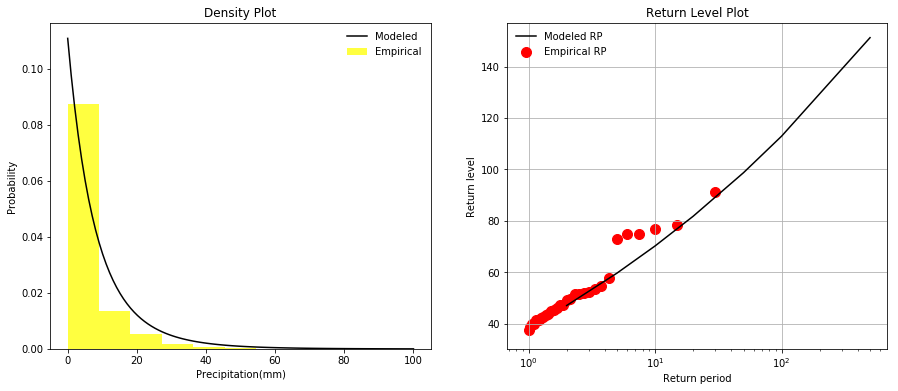

In [15]:
rl_baseline = extreme_value_analysis_gp(PDS_baseline, threshold, 'Livneh (1961-1990)')

Number of observations in PDS = 2899
GP model fitted to Partial Duration Series Series using MLE estimation method
Estimated Parameters:
shape: 0.14161286161951364, location: 0.022637898092172738, scale: 10.580643586094396
Return Levels:
2-year Return Level =  59.85087983267583 mm
5-year Return Level =  76.26013804083233 mm
10-year Return Level =  90.16742412029993 mm
20-year Return Level =  105.50907542219804 mm
50-year Return Level =  128.24443412189459 mm
100-year Return Level =  147.51325989970002 mm


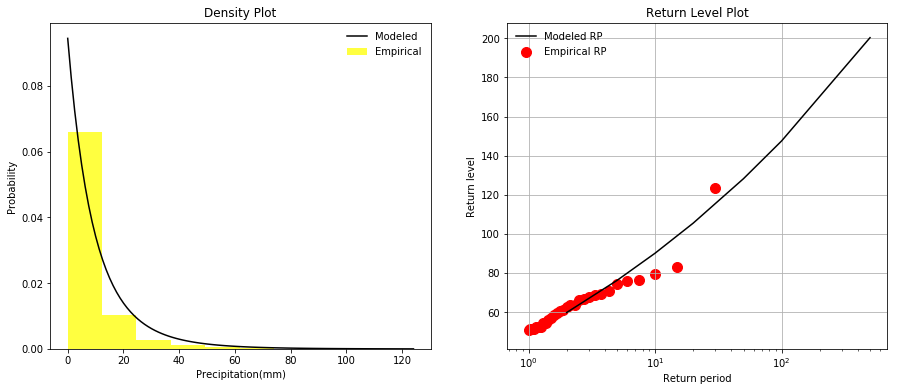

In [16]:
# Filter data by baseline time period
modelMidDF = df.loc[(df['wateryear'] >= 2021) & (df['wateryear'] <= 2050) & (df['series'] == 'CNRM-CM5')]

# Filter out zero precip values
modelMidDF = modelMidDF.loc[(modelMidDF['value'] > 0)]

# Create an array of all non-zero daily values 
PDS_mid = modelMidDF['value'].values
print('Number of observations in PDS =', len(PDS_mid))

rl_midcentury = extreme_value_analysis_gp(PDS_mid, threshold, 'CNRM-CM5 (2021-2050)')

Number of observations in PDS = 2798
GP model fitted to Partial Duration Series Series using MLE estimation method
Estimated Parameters:
shape: 0.13324740317466177, location: 0.0018398814401717899, scale: 11.233029026158864
Return Levels:
2-year Return Level =  60.19658596211694 mm
5-year Return Level =  76.86603385775612 mm
10-year Return Level =  90.89953355989938 mm
20-year Return Level =  106.29090981348772 mm
50-year Return Level =  128.94614730001902 mm
100-year Return Level =  148.01890066951697 mm


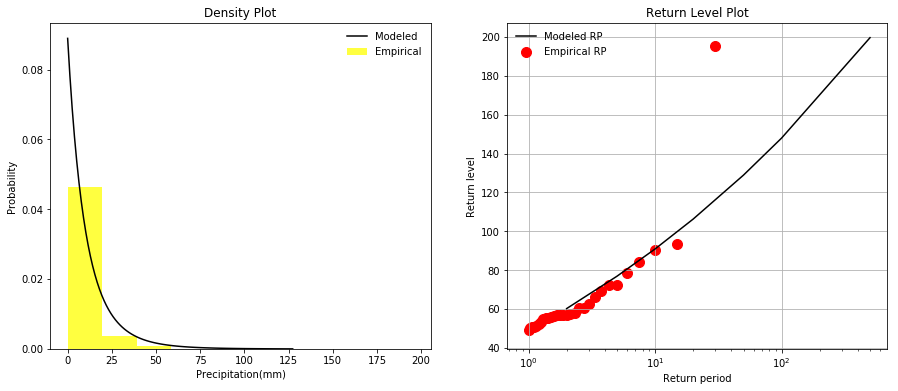

In [17]:
# Filter data by baseline time period
modelEndDF = df.loc[(df['wateryear'] >= 2071) & (df['wateryear'] <= 2099) & (df['series'] == 'CNRM-CM5')]

# Filter out zero precip values
modelEndDF = modelEndDF.loc[(modelEndDF['value'] > 0)]

# Create an array of all non-zero daily values 
PDS_end = modelEndDF['value'].values
print('Number of observations in PDS =', len(PDS_end))

rl_endcentury = extreme_value_analysis_gp(PDS_end, threshold, 'CNRM-CM5 (2071-2099)')

In [18]:
rl = pd.concat([rl_baseline, rl_midcentury, rl_endcentury])
rl

,RP,RL,Period
0,2,47.002520,Livneh (1961-1990)
1,5,59.615217,Livneh (1961-1990)
2,10,70.193633,Livneh (1961-1990)
3,20,81.757936,Livneh (1961-1990)
4,50,98.715464,Livneh (1961-1990)
5,100,112.937941,Livneh (1961-1990)
6,500,151.284992,Livneh (1961-1990)
0,2,59.850880,CNRM-CM5 (2021-2050)
1,5,76.260138,CNRM-CM5 (2021-2050)
2,10,90.167424,CNRM-CM5 (2021-2050)


### Compare Return Levels between baseline and projections

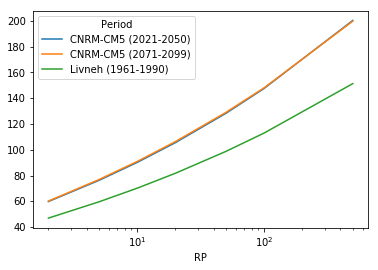

In [19]:
rl.pivot(index='RP', columns='Period', values='RL').plot(logx=True)